In [32]:
import cv2
import imutils
import numpy as np
import pytesseract
from PIL import Image
from matplotlib import pyplot as plt 

img = cv2.imread('5.jpg',cv2.IMREAD_COLOR)

img = cv2.resize(img, (620,480) )

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grey scale
gray = cv2.bilateralFilter(gray, 11, 17, 17) #Blur to reduce noise
edged = cv2.Canny(gray, 40, 150) #Perform Edge detection

plt.imshow(edged)


# find contours in the edged image, keep only the largest
# ones, and initialize our screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

# loop over our contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)

    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
    detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)

# Masking the part other than the number plate
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

# Now crop
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]
 

#Read the number plate
text = pytesseract.image_to_string(Cropped, config='-l eng --oem 3 --psm 12')
print("Detected Number is:",text)

plt.imshow(img)
plt.imshow(Cropped)




error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/resize.cpp:3718: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


TEU9B5}


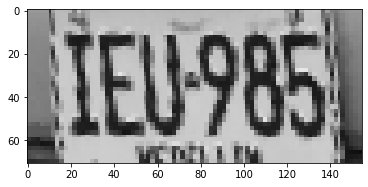

In [29]:
from PIL import Image
img = Image.open ('6.png')
text = pytesseract.image_to_string(img, config='-l eng --oem 3 --psm 12')
plt.imshow(img)
print (text)
